   Unnamed: 0  bedrooms  bathrooms  sqft_living floors  waterfront  view  \
0           0         3          1         1180      1           0     0   
1           1         3          2         2570      2           0     0   
2           2         2          1          770      1           0     0   
3           3         4          3         1960      1           0     0   
4           4         3          2         1680      1           0     0   

   grade  sqft_above  sqft_basement        zipcode  sqft_living15   price  
0      7        1180              0  310612.755725           1340  221900  
1      7        2170            400  469928.767726           1690  538000  
2      6         770              0  462488.869258           2720  180000  
3      7        1050            910  551768.520913           1360  604000  
4      8        1680              0  685675.843537           1800  510000  


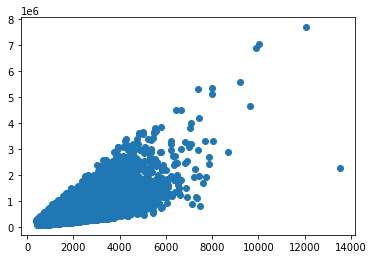

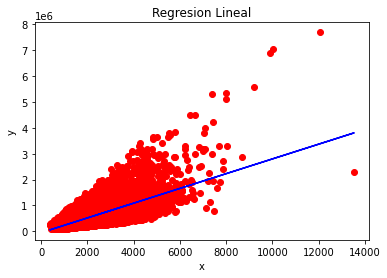

prediccion
Precisión de la regresión lineal:  0.49744105590994847


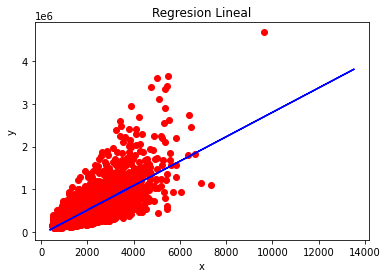

R2:  0.46928721790322414


In [1]:
#sacar una regresion  del csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor

#leer el csv
import pandas as pd
data = pd.read_csv('limpiezarealizada.csv', delimiter=",")
print(data.head())

#analisis del csv
data.describe()

#graficar
plt.scatter(data['sqft_living'], data['price'])
plt.show()

#regresion lineal
x = data['sqft_living'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regresion = LinearRegression()
regresion.fit(x_train, y_train)

#graficar
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regresion.predict(x_train), color='blue')
plt.title('Regresion Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#predecir
print("prediccion")
y_pred = regresion.predict(x_test)
#precision de la prediccion
print('Precisión de la regresión lineal: ', regresion.score(x_train, y_train))

#graficar

plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regresion.predict(x_train), color='blue')
plt.title('Regresion Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#r2
print('R2: ', r2_score(y_test, y_pred))

In [7]:
print("La matriz de correlacion es la siguiente: ")
print(data.corr())

               Unnamed: 0  bedrooms  bathrooms  sqft_living  waterfront  \
Unnamed: 0       1.000000  0.010030   0.087415     0.044874   -0.007636   
bedrooms         0.010030  1.000000   0.487955     0.578212   -0.006834   
bathrooms        0.087415  0.487955   1.000000     0.702719    0.065424   
sqft_living      0.044874  0.578212   0.702719     1.000000    0.103854   
waterfront      -0.007636 -0.006834   0.065424     0.103854    1.000000   
view            -0.013499  0.080008   0.203300     0.284709    0.401971   
grade            0.082312  0.356563   0.591830     0.762779    0.082888   
sqft_above       0.072252  0.479386   0.600458     0.876448    0.072109   
sqft_basement   -0.042036  0.302808   0.334643     0.435130    0.080559   
zipcode          0.009463  0.124969   0.234542     0.298181    0.017362   
sqft_living15    0.026691  0.393406   0.498534     0.756402    0.086507   
price            0.027436  0.308787   0.519628     0.701917    0.266398   

                   view 

In [8]:
#obtener precision de distintos modelos de regresion y devolver la mas alta
#importar librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

def get_best_model_and_accuracy(x_train, x_test, y_train, y_test):
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('LASSO', Lasso()))
    models.append(('EN', ElasticNet()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor()))
    models.append(('SVR', SVR()))
    models.append(('AB', AdaBoostRegressor()))
    models.append(('GB', GradientBoostingRegressor()))
    models.append(('RF', RandomForestRegressor()))
    models.append(('ET', ExtraTreesRegressor()))
    models.append(('BR', BayesianRidge()))
    models.append(('ARD', ARDRegression()))
    models.append(('PAR', PassiveAggressiveRegressor()))
    models.append(('TSR', TheilSenRegressor()))
    models.append(('RANSAC', RANSACRegressor()))
    models.append(('HR', HuberRegressor()))
    # evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        results.append(r2_score(y_test, y_pred))
        names.append(name)
        msg = "%s: %f" % (name, r2_score(y_test, y_pred))
        print(msg)
    return names[results.index(max(results))]
print(get_best_model_and_accuracy(x_train, x_test, y_train, y_test))

LR: 0.469287
LASSO: 0.469287
EN: 0.469287
KNN: 0.405743
CART: 0.443197


c:\Users\Familia\.Origin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR: -0.050672


c:\Users\Familia\.Origin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AB: 0.300205


c:\Users\Familia\.Origin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GB: 0.494284


C:\Users\Familia\AppData\Local\Temp/ipykernel_2616/47228137.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RF: 0.467068


C:\Users\Familia\AppData\Local\Temp/ipykernel_2616/47228137.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


ET: 0.447245
BR: 0.469292
ARD: 0.469292
PAR: 0.334377


c:\Users\Familia\.Origin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Familia\.Origin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Familia\.Origin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Familia\.Origin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

TSR: 0.443158
RANSAC: 0.467072
HR: 0.457904
GB


c:\Users\Familia\.Origin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
